In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm
from keras.utils import np_utils

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

Using TensorFlow backend.


In [2]:
def get_data(path, resize_dim=None):
    
    # If data is numpy array
    #img = np.load(path)
    #img = np.asarray(np.dstack((img, img, img)), dtype=np.float64)
    
    # If data is image
    img = cv2.imread(path) # not doing grayscale read since we have to train VGG with 3-channels
    #img = img / 255.0
    
    if resize_dim is not None:
        img=cv2.resize(img,(resize_dim, resize_dim),interpolation=cv2.INTER_AREA)    
    else:
        pass
    return img

In [3]:
low_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/0")
high_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/1")
low_paths, high_paths

('E:\\ECIR_2020\\ecir2020\\2D\\dataset\\2D_images/0',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\2D_images/1')

In [4]:
len(os.listdir(low_paths)), len(os.listdir(high_paths))

(12423, 12493)

In [5]:
low_images = [os.path.join(low_paths, x) for x in os.listdir(low_paths)]
high_images = [os.path.join(high_paths, x) for x in os.listdir(high_paths)]

len(low_images), len(high_images)

(12423, 12493)

In [6]:
low_images[0], high_images[0]

('E:\\ECIR_2020\\ecir2020\\2D\\dataset\\2D_images/0\\101_0.png',
 'E:\\ECIR_2020\\ecir2020\\2D\\dataset\\2D_images/1\\100_0.png')

In [7]:
low_2D_images=np.array([get_data(path, 299) for path in tqdm(low_images[:])])
low_2D_images.shape

100%|████████████████████████████████████████████████████████████████████████████| 12423/12423 [02:11<00:00, 94.44it/s]


(12423, 299, 299, 3)

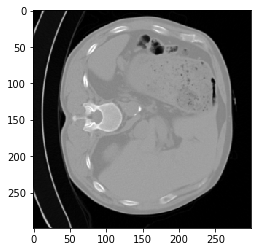

In [8]:
plt.imshow(low_2D_images[18], cmap='gray')

In [9]:
low_2D_images[0][250:252, 300:305]

array([], shape=(2, 0, 3), dtype=uint8)

In [10]:
max(low_2D_images[0].flatten()), min(low_2D_images[0].flatten())

(255, 0)

In [11]:
high_2D_images=np.array([get_data(path, 299) for path in tqdm(high_images[:])])
high_2D_images.shape

100%|███████████████████████████████████████████████████████████████████████████| 12493/12493 [01:46<00:00, 117.85it/s]


(12493, 299, 299, 3)

In [12]:
high = np.array([1 for _ in range(len(high_2D_images))])
low = np.array([0 for _ in range(len(low_2D_images))])

high.shape, low.shape

((12493,), (12423,))

In [13]:
x_all = np.concatenate((high_2D_images, low_2D_images), axis=0)
y_all = np.concatenate((high, low), axis=0)
print(x_all.shape, y_all.shape)

(24916, 299, 299, 3) (24916,)


In [14]:
y_all

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
num_classes = 2
y_all = np_utils.to_categorical(y_all, num_classes)
y_all.shape

(24916, 2)

In [16]:
np.save("{}/x_train.npy".format(TRAIN_DATASET_PATH), x_all)
np.save("{}/y_train.npy".format(TRAIN_DATASET_PATH), y_all)

In [17]:
print("Done!")

Done!
